In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

# Cargar dataset
df_partidos = pd.read_csv('datos_cebollitas.csv')

df_partidos.head()

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML


In [3]:
scaler_norm = MinMaxScaler()

df_partidos['tiros_arco_local_norm'] = scaler_norm.fit_transform(df_partidos[['tiros_arco_local']])
df_partidos['tiros_arco_visitante_norm'] = scaler_norm.fit_transform(df_partidos[['tiros_arco_visitante']])

df_partidos[['tiros_arco_local', 'tiros_arco_local_norm', 'tiros_arco_visitante', 'tiros_arco_visitante_norm']].head()

,tiros_arco_local,tiros_arco_local_norm,tiros_arco_visitante,tiros_arco_visitante_norm
0,12,1.000000,6,0.333333
1,12,1.000000,3,0.000000
2,10,0.777778,7,0.444444
3,3,0.000000,3,0.000000
4,7,0.444444,12,1.000000


In [5]:
scaler_std = StandardScaler()

df_partidos['posesion_local_std'] = scaler_std.fit_transform(df_partidos[['posesion_local (%)']])
df_partidos['posesion_visitante_std'] = scaler_std.fit_transform(df_partidos[['posesion_visitante (%)']])

df_partidos[['posesion_local (%)', 'posesion_local_std', 'posesion_visitante (%)', 'posesion_visitante_std']].head()

,posesion_local (%),posesion_local_std,posesion_visitante (%),posesion_visitante_std
0,54,0.624415,46,-0.624415
1,60,1.623479,40,-1.623479
2,55,0.790926,45,-0.790926
3,57,1.123947,43,-1.123947
4,52,0.291394,48,-0.291394


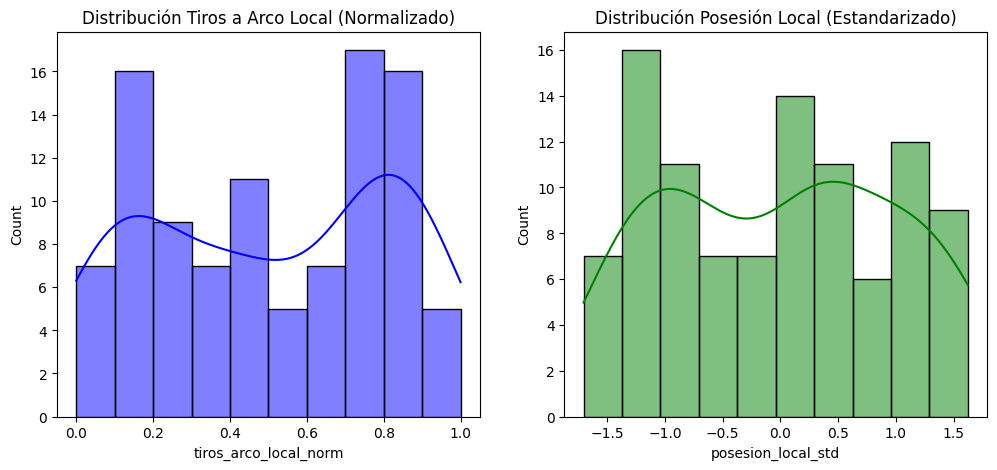

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df_partidos['tiros_arco_local_norm'], bins=10, kde=True, ax=ax[0], color='blue')
ax[0].set_title('Distribución Tiros a Arco Local (Normalizado)')


sns.histplot(df_partidos['posesion_local_std'], bins=10, kde=True, ax=ax[1], color='green')
ax[1].set_title('Distribución Posesión Local (Estandarizado)')
plt.show()